**Importing Libraries**

In [41]:
import numpy as np #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
import matplotlib.pyplot as plt
import os
import torch
from tensorflow import keras
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers #A Layer consists of a tensor - in tensor - out computation function
from tensorflow.keras.layers import Dense , Flatten
# Faltten - used fot flattening the input or change the dimension
# Dense - Dense Layer is the regular deeply connected in 
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dropout  # conv2d -Convolutional Layer
from tensorflow.keras.optimizers import Adam   #optimizer
from keras.utils import np_utils #used for one - hot encoding

In [40]:
pwd

'/home/wsuser/work'

In [42]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
%ls /content

ls: cannot access '/content': No such file or directory


In [ ]:
ls

**Getting Data and Pre Process it**

In [43]:
(x_train , y_train),(x_test , y_test) = mnist.load_data() #x contains the images and y has its label, like if its the image of 1 then its label will be 1.
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

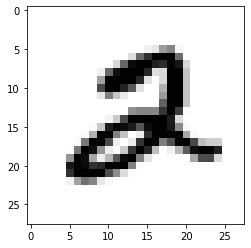

In [5]:
plt.imshow(x_train[5] , cmap = "binary")

In [44]:
# Pre Process the images

#Normalizing the imaeges to [0,1] range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#expand the dimensions of the images to (28,28,1)[we use 1 here bcoz the image we take is binary]
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [45]:
#one hot encoding
#[1 will be prensent in the array if that particular image has that value.ex. in 2nd row the second image has value 0 so 1 is present in 0th position]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

**Model Building**

In [46]:
model = Sequential() #INITIALIZE

model.add(Conv2D(32, (3,3), input_shape = (28,28,1) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Conv2D(64, (3,3) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))#dense is used for classification and 10(numbers from 0-9) is the num of layers.

In [47]:
input_shape = (28,28,1)
model.build(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [48]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [49]:
#callbacks

#EarlyStopping

es = EarlyStopping(monitor = "val_acc", min_delta= 0.01, patience = 5 , verbose= 1)
 
 #Model Checpoint

mc = ModelCheckpoint('./bestmodel.h5' , monitor = "val_acc", verbose = 1, save_best_only = True)
 
cb = [es,mc] 

**Model Training**

In [ ]:
his = model.fit(x_train,y_train, epochs = 50, validation_split = 0.3,callbacks = cb)

Epoch 1/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0700 - val_accuracy: 0.9898
Epoch 2/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0647 - val_accuracy: 0.9899
Epoch 3/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0553 - val_accuracy: 0.9911
Epoch 4/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0590 - val_accuracy: 0.9911
Epoch 5/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0599 - val_accuracy: 0.9913
Epoch 6/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0648 - val_accuracy: 0.9906
Epoch 7/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0612 -

Epoch 19/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0579 - val_accuracy: 0.9914
Epoch 20/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0574 - val_accuracy: 0.9915
Epoch 21/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0612 - val_accuracy: 0.9916
Epoch 22/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0628 - val_accuracy: 0.9914
Epoch 23/50
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0559 - val_accuracy: 0.9919
Epoch 24/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0764 - val_accuracy: 0.9898
Epoch 25/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0

Epoch 37/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0667 - val_accuracy: 0.9909
Epoch 38/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0736 - val_accuracy: 0.9893
Epoch 39/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0612 - val_accuracy: 0.9911
Epoch 40/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.0699 - val_accuracy: 0.9902
Epoch 41/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0699 - val_accuracy: 0.9912
Epoch 42/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0669 - val_accuracy: 0.9921
Epoch 43/50
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0

In [ ]:
model.save("digitreg.h5")

In [64]:
#save the model

model.save("digitreg.h5")
model_path = "/content/drive/MyDrive/digitreg.h5"
model_s = keras.models.load_model( "/content/digitreg.h5")

In [ ]:
!tar -zcvf handwritten-digit-recognition-model.tgz digitreg.h5

In [65]:
#model evalutaion/ accuracy

score = model_s.evaluate(x_test, y_test)
print(f"the model accuracy is {score[1]} ")
print(f"the model loss is {score[0]} ")

313/313 [==============================] - 4s 11ms/step - loss: 0.0397 - accuracy: 0.9926
the model accuracy is 0.9926000237464905 
the model loss is 0.03968239203095436 


# IBM Deployment

In [18]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 13.0 MB/s eta 0:00:01


In [20]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "ydsVJmqjGOQz-DPlKpo72hizlL3prSNkuQ1Jj2bjPoFR"
}
client = APIClient(wml_credentials)

In [21]:
client

In [31]:
def guid_space_name(client,Newspace):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==Newspace)['metadata']['id'])

In [32]:
space_uid = guid_space_name(client, 'Newspace')
print("SPACE UID "+space_uid)

SPACE UID 936dc63b-8437-4183-a109-b29cf7928a6e


In [33]:
client.set.default_space(space_uid)

'SUCCESS'

In [34]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [38]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [39]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details=client.repository.store_model(model='handwritten-digit-recognition-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7,
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_id=client.repository.get_model_id(model_details)

In [ ]:
model_id

In [ ]:
client.repository.download(model_id, 'Handwrittendigitreg.tar.gb')